In [1]:
import pandas as pd
import quandl
import re
import matplotlib.pyplot as plt
from datetime import datetime
apple = quandl.get("WIKI/AAPL", start_date = "2014-01-01", end_date = "2017-01-01")
dates_index = pd.to_datetime(apple.index)
years = dates_index.year
data_dic = {}
data_dic['Years'] = list(years)
for names in apple:
    data_dic[names] = list(apple[names])
appleDf = pd.DataFrame(data_dic)
appleDf = appleDf.set_index(apple.index)
apple_year = appleDf.groupby('Years').mean()
appleDf['Variation'] = appleDf['Open'] - appleDf['Close']
apple_year

QuandlError: (Status 403) Something went wrong. Please try again. If you continue to have problems, please contact us at connect@quandl.com.

Text(0, 0.5, 'Price')

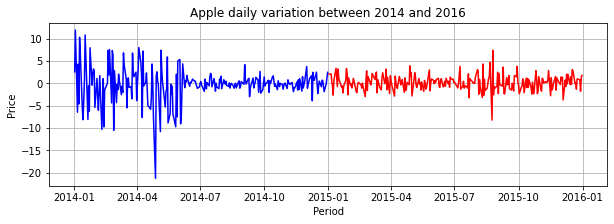

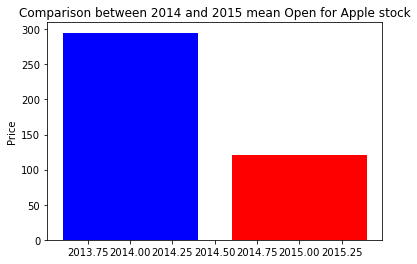

In [44]:
fig1, daily_open = plt.subplots(figsize=(10, 3))
daily_open.grid(visible = True)
fig2, mean_open = plt.subplots()
daily_open.plot(appleDf[appleDf['Years'] == 2014]['Variation'], color = 'blue')
daily_open.plot(appleDf[appleDf['Years'] > 2014]['Variation'], color = 'red')
daily_open.set_xlabel("Period")
daily_open.set_ylabel("Price")
daily_open.set_title('Apple daily variation between 2014 and 2016')
mean_open.bar([2014, 2015, ], apple_year['Open'], color = ['blue', 'red'])
mean_open.set_title("Comparison between 2014 and 2015 mean Open for Apple stock")
mean_open.set_ylabel('Price')

In [4]:
#from matplotlib.backends.backend_pdf import PdfPages
#with PdfPages("analyse apple stock between 2014 and 2015.pdf") as pdf:
   # pdf.savefig(fig1)
    #pdf.savefig(fig2)

In [31]:
columnList = []
for columns in appleDf:
    columnList.append(columns)
appleDf[columnList]
liappleDf.columns[:3]

Index(['Years', 'Open', 'High'], dtype='object')